## Towards Understanding Clients of FHFA loans.
By Mahfuz Miah, February 3, 2020

## 1. Background
**Source of Data**: https://www.fhfa.gov/DataTools/Downloads/Pages/FHLBank-Public-Use-Database-Previous-Years.aspx

**What is FHFA?**
- Federal Housing Finance Agency, Federal Home Loan Bank Purchased Mortgage Files

**What is the goal of this project?**
- What can we learn about clients of FHFA?

**What is the goal of FHFA as government agency?**
- "An independent regulatory agency, we oversee vital components of the secondary mortgage market including Fannie Mae, Freddie Mac and the Federal Home Loan Banks.  Our goal is to keep them, and the overall housing finance system, healthy."

**Dictionary of Column Names and Data Meanings:**
https://www.fhfa.gov/DataTools/Downloads/Documents/FHLBank-PUDB/AMA_PUDB_definitions_2018.pdf


## 2. Guiding Question and Significance
**Can we predict refinance status of a mortgage based on originating features of the mortgage and client characteristics?**


- Governments have policies to help the public while also protecting against waste. Though the FHFA has regulations in place to allow for good mortgage transactions to take place, not all mortgages end well. Some of these lead to refinancing - in other cases, people take the refinancing route for better interest rates or a variety of other reasons. Can we cluster for these mortgage types and extract relavent features predict and are associated with refinance status; these features can help inform future FHFA policy guidance for Fannie Mae, Freddie Mac.

- Such findings could also direct the government to provide services or resources to counter imbalances in populations or locations that may or may not be purchasing or refiancing homes. This would benefit the agency and the public as a whole.


## 3. Understanding and Preparing the Data Set

### a. Initial Set Up of Dataframe

In [1]:
#Libraries:
# import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import statistics
from pandas import DataFrame
import datetime
import seaborn as sns
from sklearn import linear_model
from sqlalchemy import create_engine
from sklearn import linear_model
from fractions import Fraction
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import normaltest
import math
from textwrap import wrap
from scipy.stats import boxcox

#clustering libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

#regression,CV libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV

from sklearn import tree
# A convenience for displaying visualizations.
from IPython.display import Image
# Packages for rendering our tree.
import pydotplus
import graphviz
import time

# set up the figure size
%matplotlib inline

In [2]:
# Set up the data

def setdata(filename):
    df = pd.read_csv(filename)
    
    # Strip and make column names lowercase so that they are easy to manage. 
    df.columns = df.columns.str.strip().str.lower()

    # Replace characters or remove spaces and make all words lowercase.
    df.columns = df.columns.str.replace(' ', '_').str.replace('/', '_').str.replace('(', '').str.replace(')', '')

    return df

In [3]:
# define path to website with the bank data
path = "https://www.fhfa.gov/DataTools/Downloads/Documents/FHLBank-PUDB/2018_PUDB_EXPORT_123118.csv"

In [4]:
# setup the dataframe
df = setdata(path)

In [5]:
# let's see what it looks like
df

,year,assignedid,bank,fipsstatecode,fipscountycode,msa,featureid,tract,minper,tramedy,...,corace2,corace3,corace4,corace5,hoepa,lienstatus,spchsggoals,fedfinstbltyplan,acqtyp,gsereo
0,2018,2131406,Atlanta,24,21,47900,9999999999,7512.01,29.85,93261,...,6,6,6,6,2,1,2,2,1,2
1,2018,2131407,Atlanta,24,17,47900,9999999999,8509.04,67.24,112623,...,6,6,6,6,2,1,2,2,1,2
2,2018,2131408,Atlanta,51,153,47900,9999999999,9012.36,40.76,140156,...,6,6,6,6,2,1,2,2,1,2
3,2018,2131409,Atlanta,51,59,47900,9999999999,4221.02,75.97,89250,...,8,8,8,8,2,1,2,2,1,2
4,2018,2131410,Atlanta,24,5,12580,9999999999,4924.02,64.56,81397,...,8,8,8,8,2,1,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65698,2018,2161350,Topeka,40,143,46140,9999999999,75.22,22.82,69635,...,6,6,6,6,2,1,2,2,1,2
65699,2018,2161351,Topeka,31,109,30700,9999999999,37.09,7.61,94198,...,6,6,6,6,2,1,2,2,1,2
65700,2018,2161352,Topeka,19,133,99999,9999999999,9602.00,3.69,69688,...,8,8,8,8,2,1,2,2,1,2
65701,2018,2161353,Topeka,31,153,36540,9999999999,106.23,10.16,98707,...,6,6,6,6,2,1,2,2,1,2


In [6]:
# how big is the df?
df.shape

(65703, 82)

In [8]:
# Let's see what the names of each column actually look like
# Also, what's inside the file? Let's take a preview.
def whats_inside(df):
    col_names = list(df.columns.values) 
    print(f"Column values in dataframe: {col_names}") 
    print(df.describe())
    return col_names

column_names = whats_inside(df)
column_names

Column values in dataframe: ['year', 'assignedid', 'bank', 'fipsstatecode', 'fipscountycode', 'msa', 'featureid', 'tract', 'minper', 'tramedy', 'locmedy', 'tractrat', 'income', 'curarey', 'incrat', 'upb', 'ltv', 'mortdate', 'acqudate', 'purpose', 'coop', 'product', 'fedguar', 'term', 'amorterm', 'selltype', 'numbor', 'first', 'cica', 'borace', 'corace', 'bogender', 'cogender', 'boage', 'coage', 'occup', 'numunits', 'bed1', 'bed2', 'bed3', 'bed4', 'aff1', 'aff2', 'aff3', 'aff4', 'rent1', 'rent2', 'rent3', 'rent4', 'rentut1', 'rentut2', 'rentut3', 'rentut4', 'geog', 'rate', 'amount', 'front', 'back', 'bocreditscore', 'cobocreditscore', 'pmi', 'self', 'proptype', 'armindex', 'armmarg', 'prepayp', 'boeth', 'race2', 'race3', 'race4', 'race5', 'coeth', 'corace2', 'corace3', 'corace4', 'corace5', 'hoepa', 'lienstatus', 'spchsggoals', 'fedfinstbltyplan', 'acqtyp', 'gsereo']
          year    assignedid  fipsstatecode  fipscountycode           msa  \
count  65703.0  6.570300e+04   65703.000000 

['year',
 'assignedid',
 'bank',
 'fipsstatecode',
 'fipscountycode',
 'msa',
 'featureid',
 'tract',
 'minper',
 'tramedy',
 'locmedy',
 'tractrat',
 'income',
 'curarey',
 'incrat',
 'upb',
 'ltv',
 'mortdate',
 'acqudate',
 'purpose',
 'coop',
 'product',
 'fedguar',
 'term',
 'amorterm',
 'selltype',
 'numbor',
 'first',
 'cica',
 'borace',
 'corace',
 'bogender',
 'cogender',
 'boage',
 'coage',
 'occup',
 'numunits',
 'bed1',
 'bed2',
 'bed3',
 'bed4',
 'aff1',
 'aff2',
 'aff3',
 'aff4',
 'rent1',
 'rent2',
 'rent3',
 'rent4',
 'rentut1',
 'rentut2',
 'rentut3',
 'rentut4',
 'geog',
 'rate',
 'amount',
 'front',
 'back',
 'bocreditscore',
 'cobocreditscore',
 'pmi',
 'self',
 'proptype',
 'armindex',
 'armmarg',
 'prepayp',
 'boeth',
 'race2',
 'race3',
 'race4',
 'race5',
 'coeth',
 'corace2',
 'corace3',
 'corace4',
 'corace5',
 'hoepa',
 'lienstatus',
 'spchsggoals',
 'fedfinstbltyplan',
 'acqtyp',
 'gsereo']

Column names are regular, single worded, understandable and don't appear with symbols that need to be handled; we don't need further cleaning. We note from the describe() function that some columns only have one value as noted by standard deviations of 0 and mean, min and max being the same integer - patterns like that tell us that the whole column only has one unique value throughout the dataset.

In [9]:
# what type of data is in each column?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65703 entries, 0 to 65702
Data columns (total 82 columns):
year                65703 non-null int64
assignedid          65703 non-null int64
bank                65703 non-null object
fipsstatecode       65703 non-null int64
fipscountycode      65703 non-null int64
msa                 65703 non-null int64
featureid           65703 non-null int64
tract               65703 non-null float64
minper              65703 non-null float64
tramedy             65703 non-null int64
locmedy             65703 non-null int64
tractrat            65703 non-null float64
income              65703 non-null int64
curarey             65703 non-null int64
incrat              65703 non-null float64
upb                 65703 non-null int64
ltv                 65703 non-null float64
mortdate            65703 non-null int64
acqudate            65703 non-null int64
purpose             65703 non-null int64
coop                65703 non-null int64
product            

In [10]:
## Let's find the percent of empty entries in each column

def percentmissing (df):
    numer = df.isnull().sum() 
    denom = df.isnull().count()

    data= []
    #Below is code I used to check what the fractions were prior to trying to view with the dataframe version 
    #i = 0 
    #for x,y in zip(numer,denom):
    #    print (numer.index[i], ":", (Fraction(x,y)))
    #    i+=1

    #View results in dataframe
    i = 0
    for x,y in zip(numer,denom):
        data.append([numer.index[i],x,(Fraction(x,y)), x*100/y])
        i+=1
    
    df1 = pd.DataFrame(data,columns = ['Column_Name','# Missing', 'Fraction Missing','Percent Missing'])
    return df1

percentmissing(df)

,Column_Name,# Missing,Fraction Missing,Percent Missing
0,year,0,0,0.0
1,assignedid,0,0,0.0
2,bank,0,0,0.0
3,fipsstatecode,0,0,0.0
4,fipscountycode,0,0,0.0
...,...,...,...,...
77,lienstatus,0,0,0.0
78,spchsggoals,0,0,0.0
79,fedfinstbltyplan,0,0,0.0
80,acqtyp,0,0,0.0


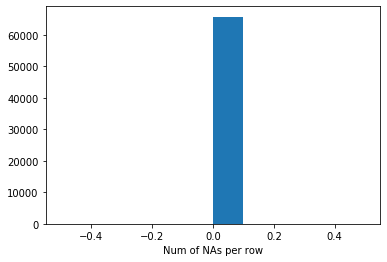

In [11]:
## Are there rows with multiple missing entries?
na_count = df.isnull().sum(axis=1) # sum up all the NAs by each row of the df
plt.hist(na_count) # make a histogram of the counts by row
plt.xlabel("Num of NAs per row") # x-axis label
plt.show()

Though we note that no null values currently exist in the data set, we can look at the dictionary documentation (link at the top) that list aberrant data for some columns as nonsensical entries, such as: 98, 999999999, 99, 99999. Let's take a look at the data as a whole see if we want to keep and clean these columns for the purposes of this model.


In [12]:
# define functions that allow us to select and make variables that parse between numeric
# and non-numeric columns in a dataframe

def num_col (df):
    numeric_columns = df.select_dtypes(['int64','float64']).columns
    print(f"The number of numerical columns is {len(numeric_columns)}")
    return numeric_columns

def non_num_col (df):
    non_numeric_columns = df.select_dtypes(['object']).columns
    print(f"The number of non-numerical columns is {len(non_numeric_columns)}")
    return non_numeric_columns

In [13]:
# define numeric column variable and show names of columns.
numeric_columns = num_col(df)
numeric_columns

The number of numerical columns is 79


Index(['year', 'assignedid', 'fipsstatecode', 'fipscountycode', 'msa',
       'featureid', 'tract', 'minper', 'tramedy', 'locmedy', 'tractrat',
       'income', 'curarey', 'incrat', 'upb', 'ltv', 'mortdate', 'acqudate',
       'purpose', 'coop', 'product', 'fedguar', 'term', 'amorterm', 'selltype',
       'numbor', 'first', 'cica', 'borace', 'corace', 'bogender', 'cogender',
       'boage', 'coage', 'occup', 'numunits', 'bed1', 'bed2', 'bed3', 'bed4',
       'aff1', 'aff2', 'aff3', 'aff4', 'rent1', 'rent2', 'rent3', 'rent4',
       'rentut1', 'rentut2', 'rentut3', 'rentut4', 'geog', 'rate', 'amount',
       'front', 'back', 'bocreditscore', 'cobocreditscore', 'pmi', 'self',
       'armindex', 'armmarg', 'boeth', 'race2', 'race3', 'race4', 'race5',
       'coeth', 'corace2', 'corace3', 'corace4', 'corace5', 'hoepa',
       'lienstatus', 'spchsggoals', 'fedfinstbltyplan', 'acqtyp', 'gsereo'],
      dtype='object')

In [14]:
# define non-numeric column variable and show names of columns.
non_numeric_columns = non_num_col(df)
non_numeric_columns

The number of non-numerical columns is 3


Index(['bank', 'proptype', 'prepayp'], dtype='object')

### b. Graphing Functions Used Throughout Notebook

In [15]:
# create a function that will make distribution plots for each numerical column in a dataframe
# function takes name of dataframe and list of numerical columns

def graphdistplt (df, columns):
    nlength = math.floor(math.sqrt(len(columns)))+1
    plt.figure(figsize=(20, 20))
    i = 1
    for col in columns:
        plt.subplot(nlength, nlength, i)
        sns.distplot(df[col], color='r')
        plt.title(F"Distribution plot of {col}")
        i+=1

    plt.tight_layout()
    plt.show()

In [16]:
# distribution visualization of data before and after boxcox transformation

def graphboxcox (df, columns):
    adj_df = df.copy()
    plt.figure(figsize=(20, 20))
    i = 1
    for col in columns:

        # original data 
        ind = 4*((i-1)//4)+i # for 1st row, 3rd row...
        plt.subplot(len(columns)//4 + 1, 4, ind)
        sns.distplot(df[col])
        plt.title(f'{col}', fontsize=12)

        # transformed data
        ind2 = 4*(((i-1)//4)+1)+i # for 2nd row, 4th row...
        adj_df[col],lam = boxcox(adj_df[col]) # transform data by taking log of data
        plt.subplot(len(columns)//4 + 1, 4, ind2)
        sns.distplot(adj_df[col], color='r')
        plt.title(f'Boxcox transformed {col},lamba = {round(lam, 2)}', fontsize=12)
        i+=1

    plt.tight_layout()
    plt.show()

In [17]:
# create a function that will make box plots for each numerical column in a dataframe
# function takes name of dataframe and list of numerical columns

def graphboxplt (df, columns):
    rowlength = math.floor(math.sqrt(len(columns)))
    fig, axes = plt.subplots(nrows=rowlength+1, ncols=(rowlength+1), figsize=(16,16)) 
    axes = axes.flatten()

    for i,x in enumerate (columns):
        #axes[i].hist(df[x])
        axes[i].set_title("\n".join(wrap(x,40))).set_y(1.05)
        axes[i].boxplot(df[x],
                        sym = "k.",
                        notch=True,  # notch shape
                        vert=True,  # vertical box alignment
                        patch_artist=True,  # fill with color
                        showfliers=True, # show outliers
                        flierprops=dict(color='red'))
    fig.tight_layout()
    fig.subplots_adjust(top=0.8)
    plt.show()
    

In [18]:
# create a function that will make scatter plots for each numerical column in a dataframe
# function takes name of dataframe and list of numerical columns

def graphscatter (df, columns, z):
    rowlength = math.floor(math.sqrt(len(columns)))
    fig, axes = plt.subplots(nrows=rowlength+1, ncols=(rowlength+1), figsize=(16,16)) 
    axes = axes.flatten()

    for i,x in enumerate (columns):
        axes[i].set_title("\n".join(wrap(x,40))).set_y(1.05)
        axes[i].scatter(df[x], df[z], alpha=0.5) 
    fig.tight_layout()
    fig.subplots_adjust(top=0.8)
    plt.show()
    

In [19]:
# create a function that will make seaborn scatter plots with regression line for 
# each numerical column in a dataframe
# function takes name of dataframe and list of numerical columns

def graphscattersns (df, columns, z):
    col_length = 5
    fig, axes = plt.subplots(nrows=len(columns)//col_length + 1, ncols=col_length, figsize=(64,64)) 
    axes = axes.flatten()

    for i,x in enumerate (columns):
        axes[i].set_title("\n".join(wrap(x,40)),fontsize = 25).set_y(1.05)
        sns.regplot(x = x, y = z, data = df, ax = axes[i]) # seaborn
    
    #fig.tight_layout()
    fig.subplots_adjust(top=1)
    plt.show()
    

### c. Dive Into The Data, EDA

In [20]:
# Too many variables, but we'd love to use if we had more computing power:
# g = sns.pairplot(df[numeric_columns]) 

In [21]:
# Too many variables, but we'd love to use if we had more computing power:
# Let's take 'purpose' of a loan into consideration and check out the pairplot
# As per the dictionary, most of the data would compare purchase vs refinance loans
# g = sns.pairplot(df[numeric_columns], hue="purpose", palette="Set2", diag_kind="kde")
## Useful for reference: https://seaborn.pydata.org/tutorial/axis_grids.html

/Users/Mahfuz-Tamim/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/Mahfuz-Tamim/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/Mahfuz-Tamim/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


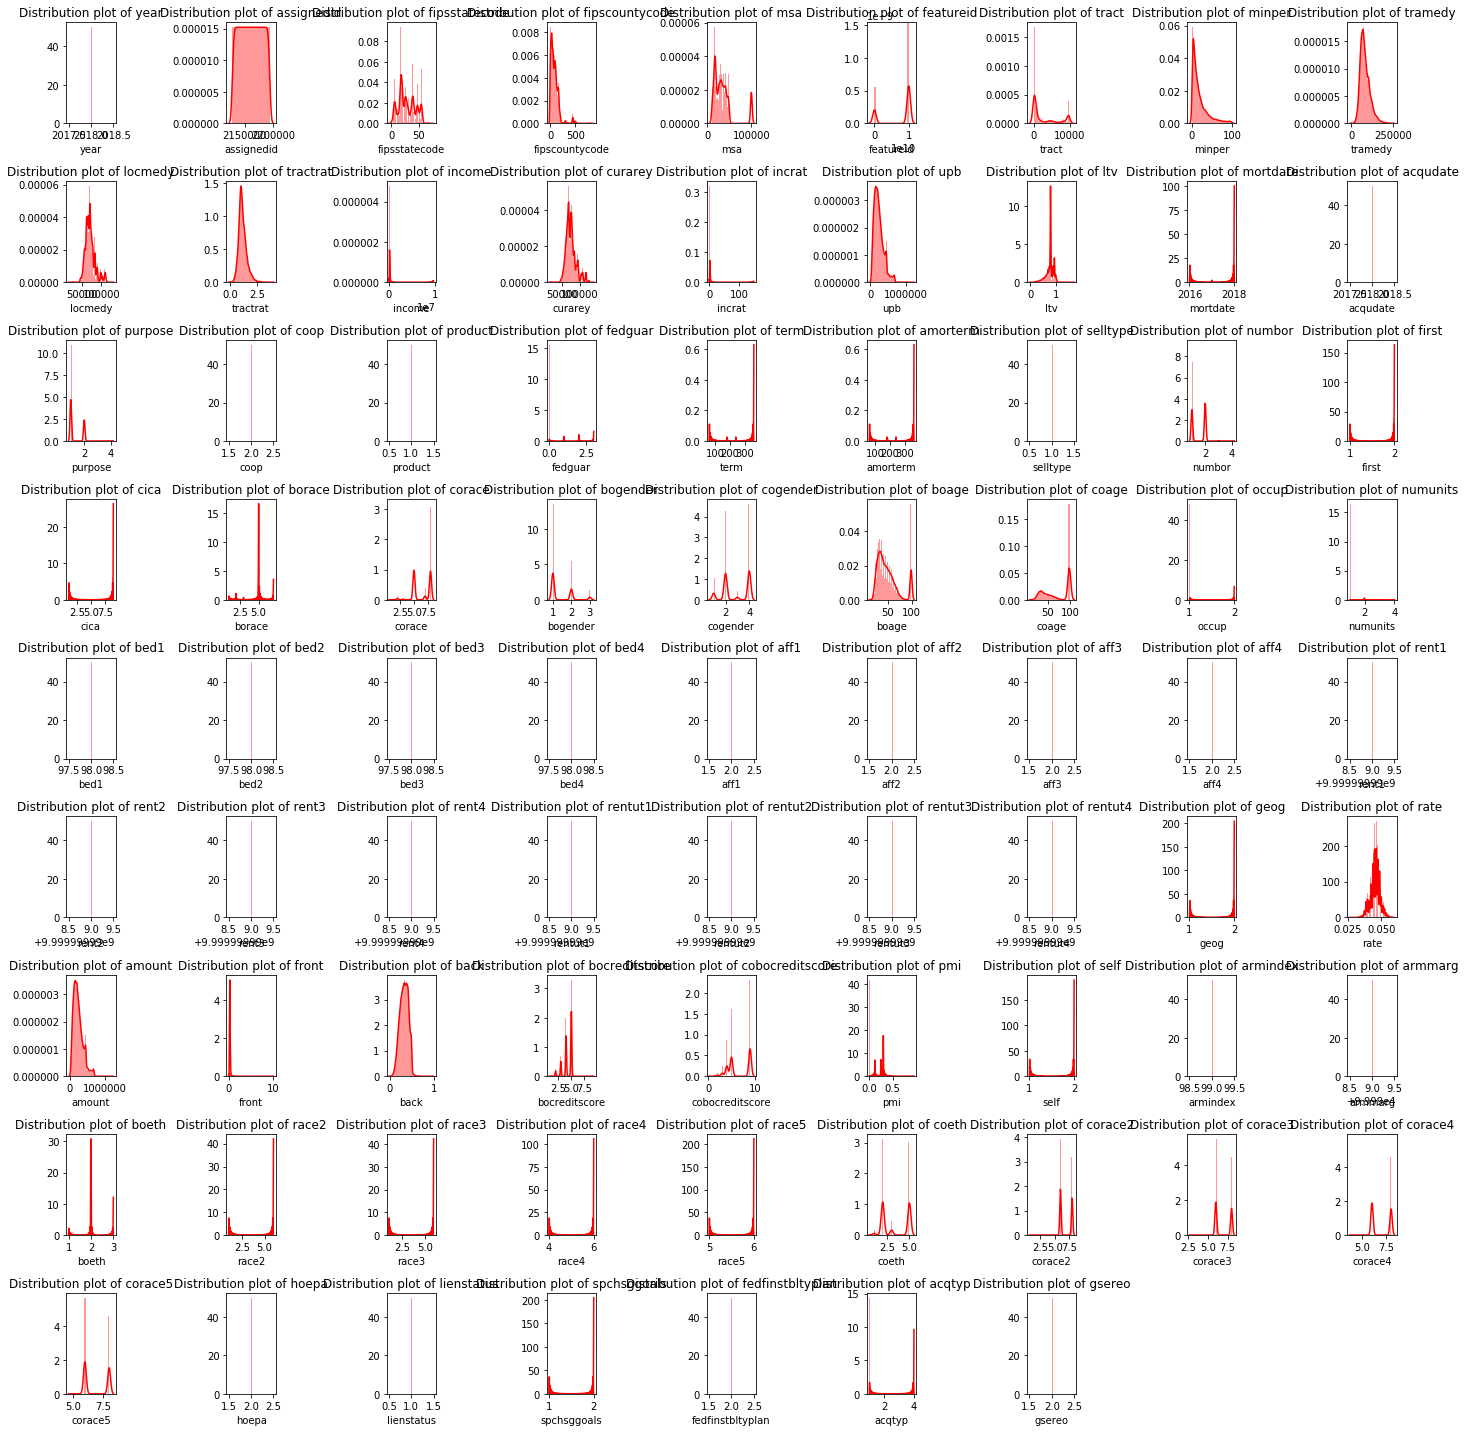

In [22]:
# visually inspect distribution for each column
graphdistplt(df,numeric_columns)

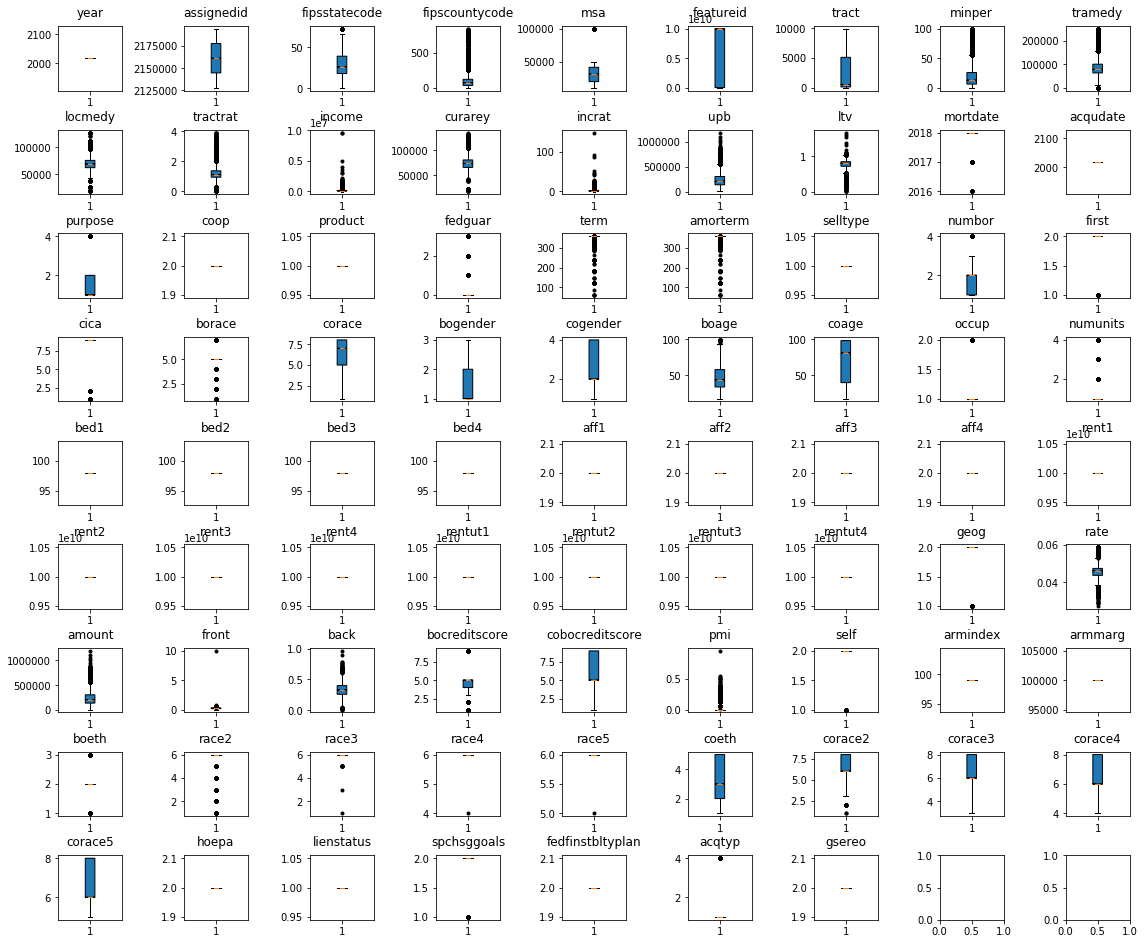

In [23]:
# visually inspect outliers  for each column
graphboxplt(df,numeric_columns)

**Takeaways:** From these graphs, we take away that many of the columns are pseudonumerical - a lot of them are actually categorical in nature but just happen to be imputted as numbers to define each category. Let's take a deeper dive into the dictionary and be more selective of the columns we want to use for clutering purposes.'

In [24]:
# copy the list of column_names
column_names

['year',
 'assignedid',
 'bank',
 'fipsstatecode',
 'fipscountycode',
 'msa',
 'featureid',
 'tract',
 'minper',
 'tramedy',
 'locmedy',
 'tractrat',
 'income',
 'curarey',
 'incrat',
 'upb',
 'ltv',
 'mortdate',
 'acqudate',
 'purpose',
 'coop',
 'product',
 'fedguar',
 'term',
 'amorterm',
 'selltype',
 'numbor',
 'first',
 'cica',
 'borace',
 'corace',
 'bogender',
 'cogender',
 'boage',
 'coage',
 'occup',
 'numunits',
 'bed1',
 'bed2',
 'bed3',
 'bed4',
 'aff1',
 'aff2',
 'aff3',
 'aff4',
 'rent1',
 'rent2',
 'rent3',
 'rent4',
 'rentut1',
 'rentut2',
 'rentut3',
 'rentut4',
 'geog',
 'rate',
 'amount',
 'front',
 'back',
 'bocreditscore',
 'cobocreditscore',
 'pmi',
 'self',
 'proptype',
 'armindex',
 'armmarg',
 'prepayp',
 'boeth',
 'race2',
 'race3',
 'race4',
 'race5',
 'coeth',
 'corace2',
 'corace3',
 'corace4',
 'corace5',
 'hoepa',
 'lienstatus',
 'spchsggoals',
 'fedfinstbltyplan',
 'acqtyp',
 'gsereo']

In [25]:
# go through library to choose features of interest and assign to a new variable
feature_columns = ['year',
#'assignedid',
                   'bank',
                   'fipsstatecode',
                   'fipscountycode',
# 'msa',
                   'featureid',
                   'tract',
                   'minper',
                   'tramedy',
                   'locmedy',
                   'tractrat',
                   'income',
                   'curarey',
                   'incrat',
                   'upb',
                   'ltv',
                   'mortdate',
                   'acqudate',
                   'purpose',
# 'coop',
                   'product',
                   'fedguar',
                   'term',
                   'amorterm',
# 'selltype',
                   'numbor',
                   'first',
# 'cica',
                   'borace',
# 'corace',
                   'bogender',
# 'cogender',
                   'boage',
# 'coage',
                   'occup',
                   'numunits',
# 'bed1',
# 'bed2',=
# 'bed3',
# 'bed4',
# 'aff1',
# 'aff2',
# 'aff3',
# 'aff4',
# 'rent1',
# 'rent2',
# 'rent3',
# 'rent4',
# 'rentut1',
# 'rentut2',
# 'rentut3',
# 'rentut4',
# 'geog',
                   'rate',
                   'amount',
                   'front',
                   'back',
                   'bocreditscore',
# 'cobocreditscore',
                   'pmi',
                   'self',
                   'proptype',
#  'armindex',
#  'armmarg',
#  'prepayp',
#  'boeth',
#  'race2',
#  'race3',
#  'race4',
#  'race5',
#  'coeth',
#  'corace2',
#  'corace3',
#  'corace4',
#  'corace5',
#  'hoepa',
#  'lienstatus',
#  'spchsggoals',
#  'fedfinstbltyplan',
#  'acqtyp',
                   'gsereo']

In [26]:
# let's see our list of possible feature columns to include into our model
feature_columns

['year',
 'bank',
 'fipsstatecode',
 'fipscountycode',
 'featureid',
 'tract',
 'minper',
 'tramedy',
 'locmedy',
 'tractrat',
 'income',
 'curarey',
 'incrat',
 'upb',
 'ltv',
 'mortdate',
 'acqudate',
 'purpose',
 'product',
 'fedguar',
 'term',
 'amorterm',
 'numbor',
 'first',
 'borace',
 'bogender',
 'boage',
 'occup',
 'numunits',
 'rate',
 'amount',
 'front',
 'back',
 'bocreditscore',
 'pmi',
 'self',
 'proptype',
 'gsereo']

In [27]:
# from the chosen feature_columns, we have to choose the features that are 
# continuous in nature.
# TODO: For future projects, it would be nice to figure out a more 
# Pythonic way to address this issue instead of handling it manually. 
# StackOverFlow has a variety of suggestions but none are readily 
# applicable nor generalizable

feature_columns_cont = ['year',
#                         'bank',
#                         'fipsstatecode',
#                         'fipscountycode',
#                         'featureid',
#                         'tract',
                        'minper',
                        'tramedy',
                        'locmedy',
                        'tractrat',
                        'income',
                        'curarey',
                        'incrat',
                        'upb',
                        'ltv',
                        'mortdate',
                        'acqudate',
#                         'purpose',
#                         'product',
#                         'fedguar',
                        'term',
                        'amorterm',
                        'numbor',
#                         'first',
#                         'borace',
#                         'bogender',
                        'boage',
#                         'occup',
                        'numunits',
                        'rate',
                        'amount',
                        'front',
                        'back',
#                         'bocreditscore',
                        'pmi',
#                         'self',
#                         'proptype',
#                         'gsereo'
                       ]

In [28]:
# these are the columns with continuous values
feature_columns_cont

['year',
 'minper',
 'tramedy',
 'locmedy',
 'tractrat',
 'income',
 'curarey',
 'incrat',
 'upb',
 'ltv',
 'mortdate',
 'acqudate',
 'term',
 'amorterm',
 'numbor',
 'boage',
 'numunits',
 'rate',
 'amount',
 'front',
 'back',
 'pmi']

In [29]:
# select the remain columns and define them as categorical data
feature_columns_cat = list(set(feature_columns).difference(feature_columns_cont))

In [30]:
# these are the columns with categorical values
feature_columns_cat

['fedguar',
 'fipscountycode',
 'bocreditscore',
 'borace',
 'self',
 'first',
 'proptype',
 'product',
 'occup',
 'featureid',
 'purpose',
 'bank',
 'tract',
 'gsereo',
 'fipsstatecode',
 'bogender']

/Users/Mahfuz-Tamim/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/Mahfuz-Tamim/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/Mahfuz-Tamim/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


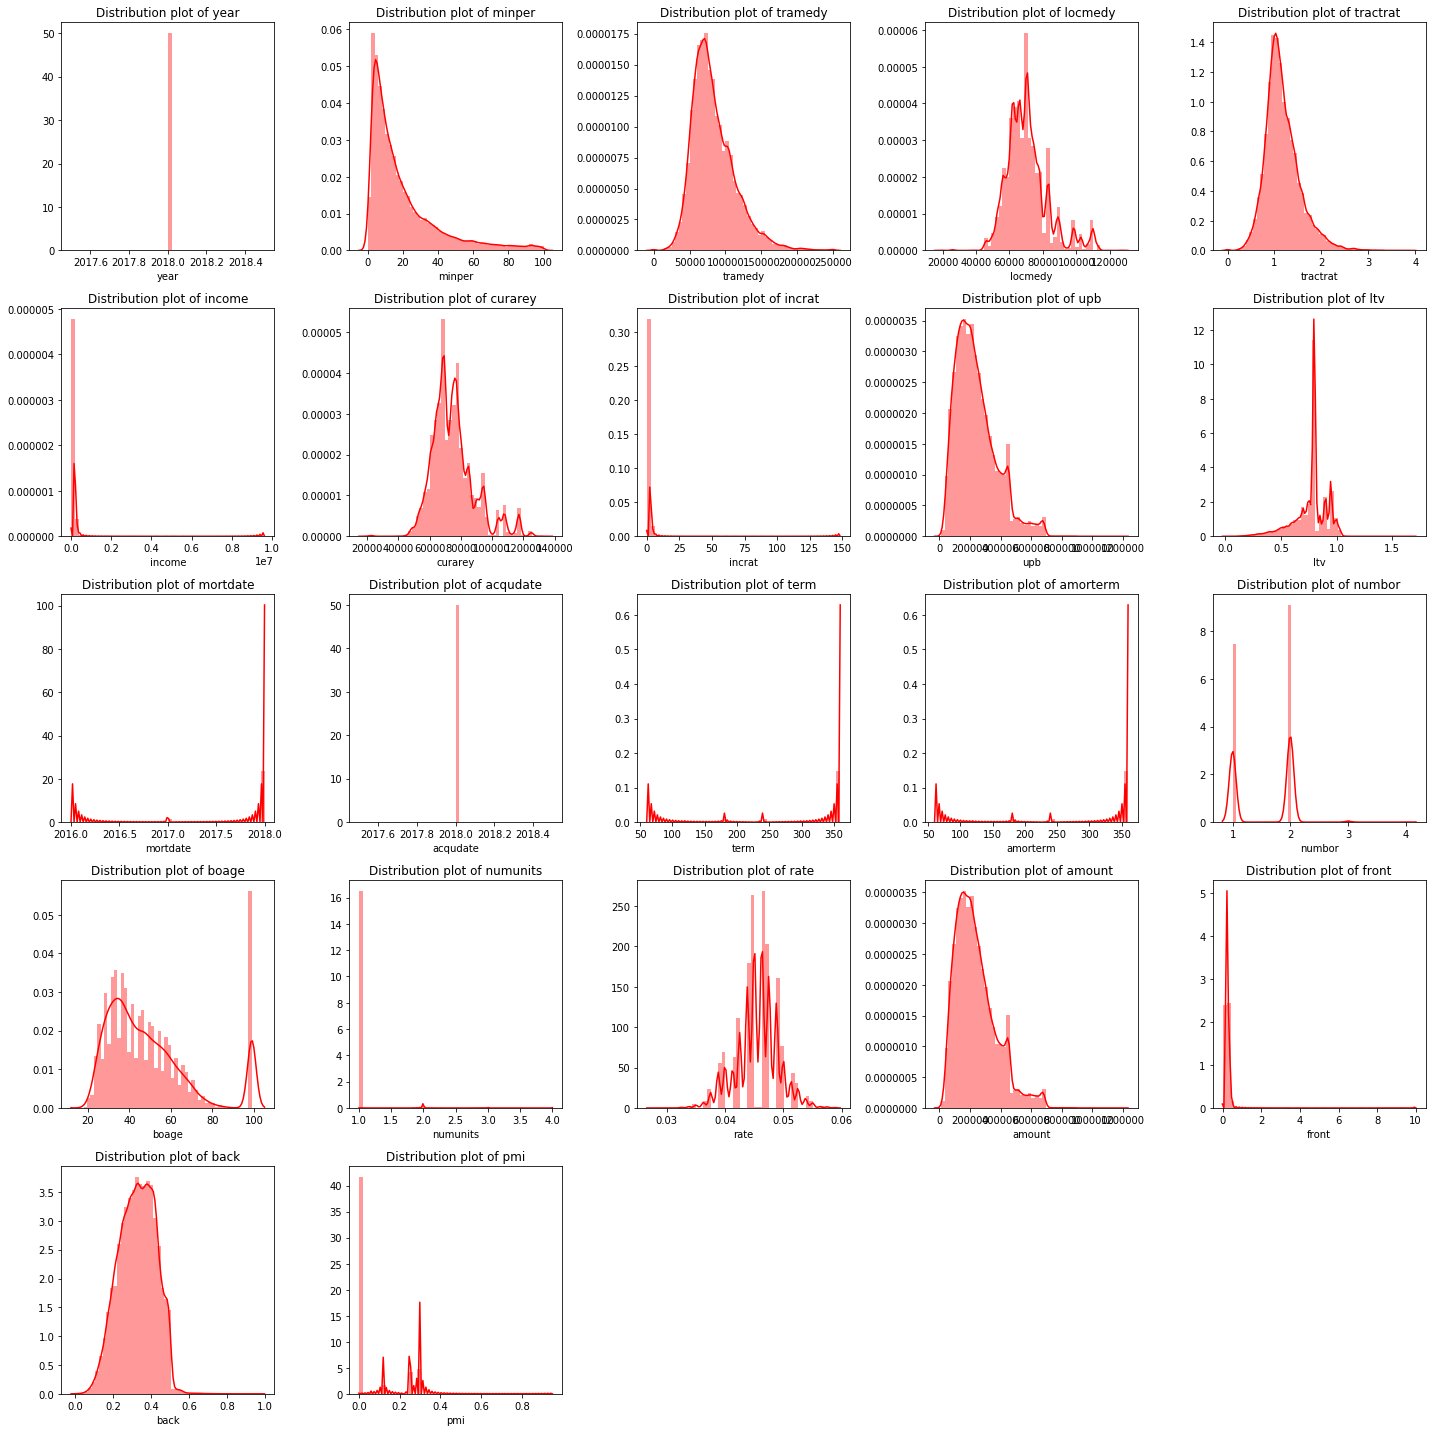

In [31]:
# Let's revist the continuous variables and see what the 
# data looks like; is there clean up to be done?
graphdistplt(df,feature_columns_cont)

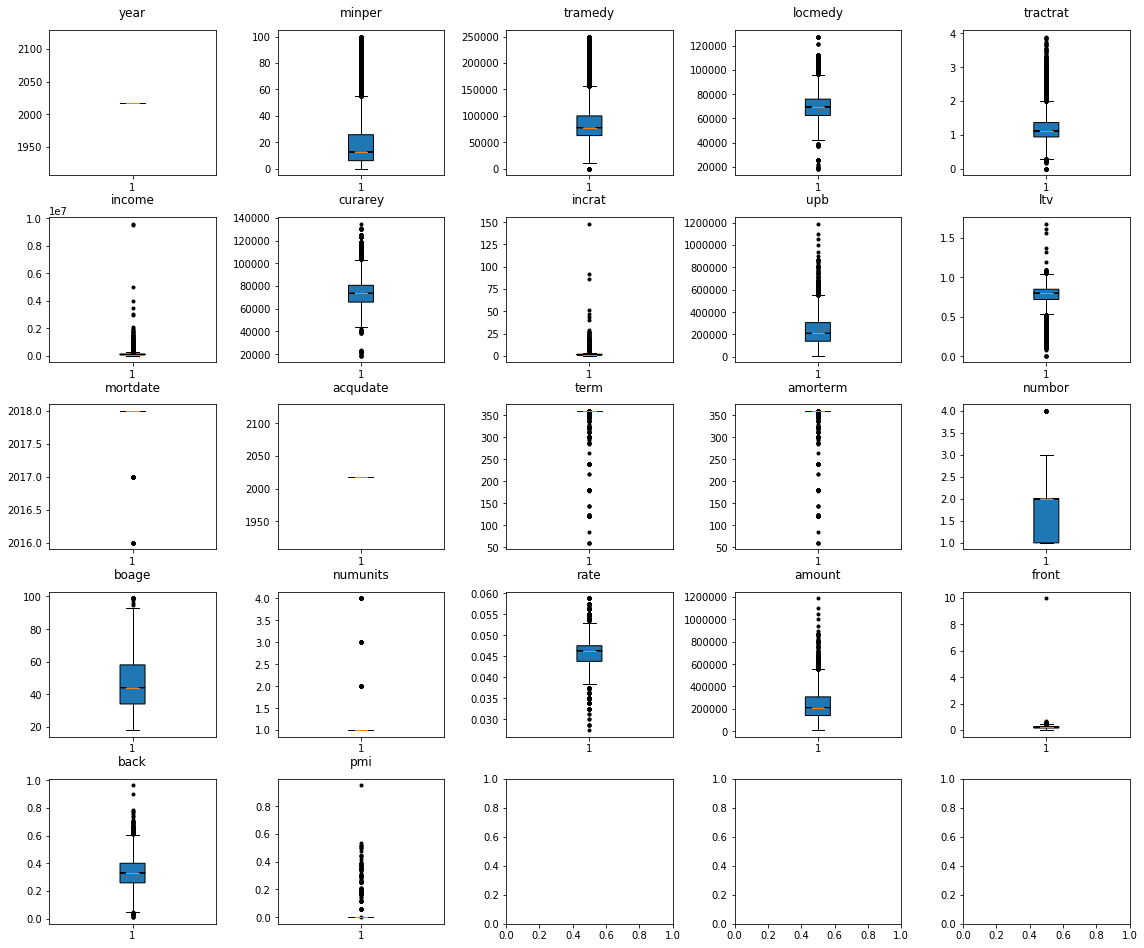

In [32]:
# Let's revist the continuous variables and see what the 
# data looks like; is there clean up to be done?
graphboxplt(df,feature_columns_cont)

We note that some of these continuous variables are not useful for our model; the dataset is mostly restricted to loans that were acquired in 2018 so year, mortdate and acqudate don't need to be investigated. Initially we were curious to see if there might be certain trends or clusters that relate to acquisition date of a mortgage but this dataset does not seem to contain the data needed to investigate such a possibility.  

NOTE ON OUTLIERS: Though these graphs may show outliers in relation to where the majority of points lie, they are not outliers in terms of non-sensical data. For example, none of the percentage data incorrectly exceeds 100% or becomes negative. Additionally, some variables also become useless if we remove these 'outliers' since the column will be reduced to single values such as the 'term' column which mostly seems to revolve around a full 360 months. We will consider handling income and boage as two columns that could benefit from removal of outliers on the upper end. These two columns can benefit from winsorization to remove the effects of really high outlier values. 

In [33]:
from scipy.stats.mstats import winsorize

# add new winsorized columns to address outliers for those columns
df['income_win'] = winsorize(df['income'], (0, 0.10))
df['age_win'] = winsorize(df['boage'], (0, 0.10))

# update the feature variables
feature_columns += ['income_win','age_win']
feature_columns_cont += ['income_win','age_win']

feature_columns.remove('income')
feature_columns.remove('boage')
print(feature_columns)
feature_columns_cont.remove('income')
feature_columns_cont.remove('boage')
print(feature_columns_cont)

['year', 'bank', 'fipsstatecode', 'fipscountycode', 'featureid', 'tract', 'minper', 'tramedy', 'locmedy', 'tractrat', 'curarey', 'incrat', 'upb', 'ltv', 'mortdate', 'acqudate', 'purpose', 'product', 'fedguar', 'term', 'amorterm', 'numbor', 'first', 'borace', 'bogender', 'occup', 'numunits', 'rate', 'amount', 'front', 'back', 'bocreditscore', 'pmi', 'self', 'proptype', 'gsereo', 'income_win', 'age_win']
['year', 'minper', 'tramedy', 'locmedy', 'tractrat', 'curarey', 'incrat', 'upb', 'ltv', 'mortdate', 'acqudate', 'term', 'amorterm', 'numbor', 'numunits', 'rate', 'amount', 'front', 'back', 'pmi', 'income_win', 'age_win']


In [34]:
# How many categorical columns do we have
len(feature_columns_cat)

16

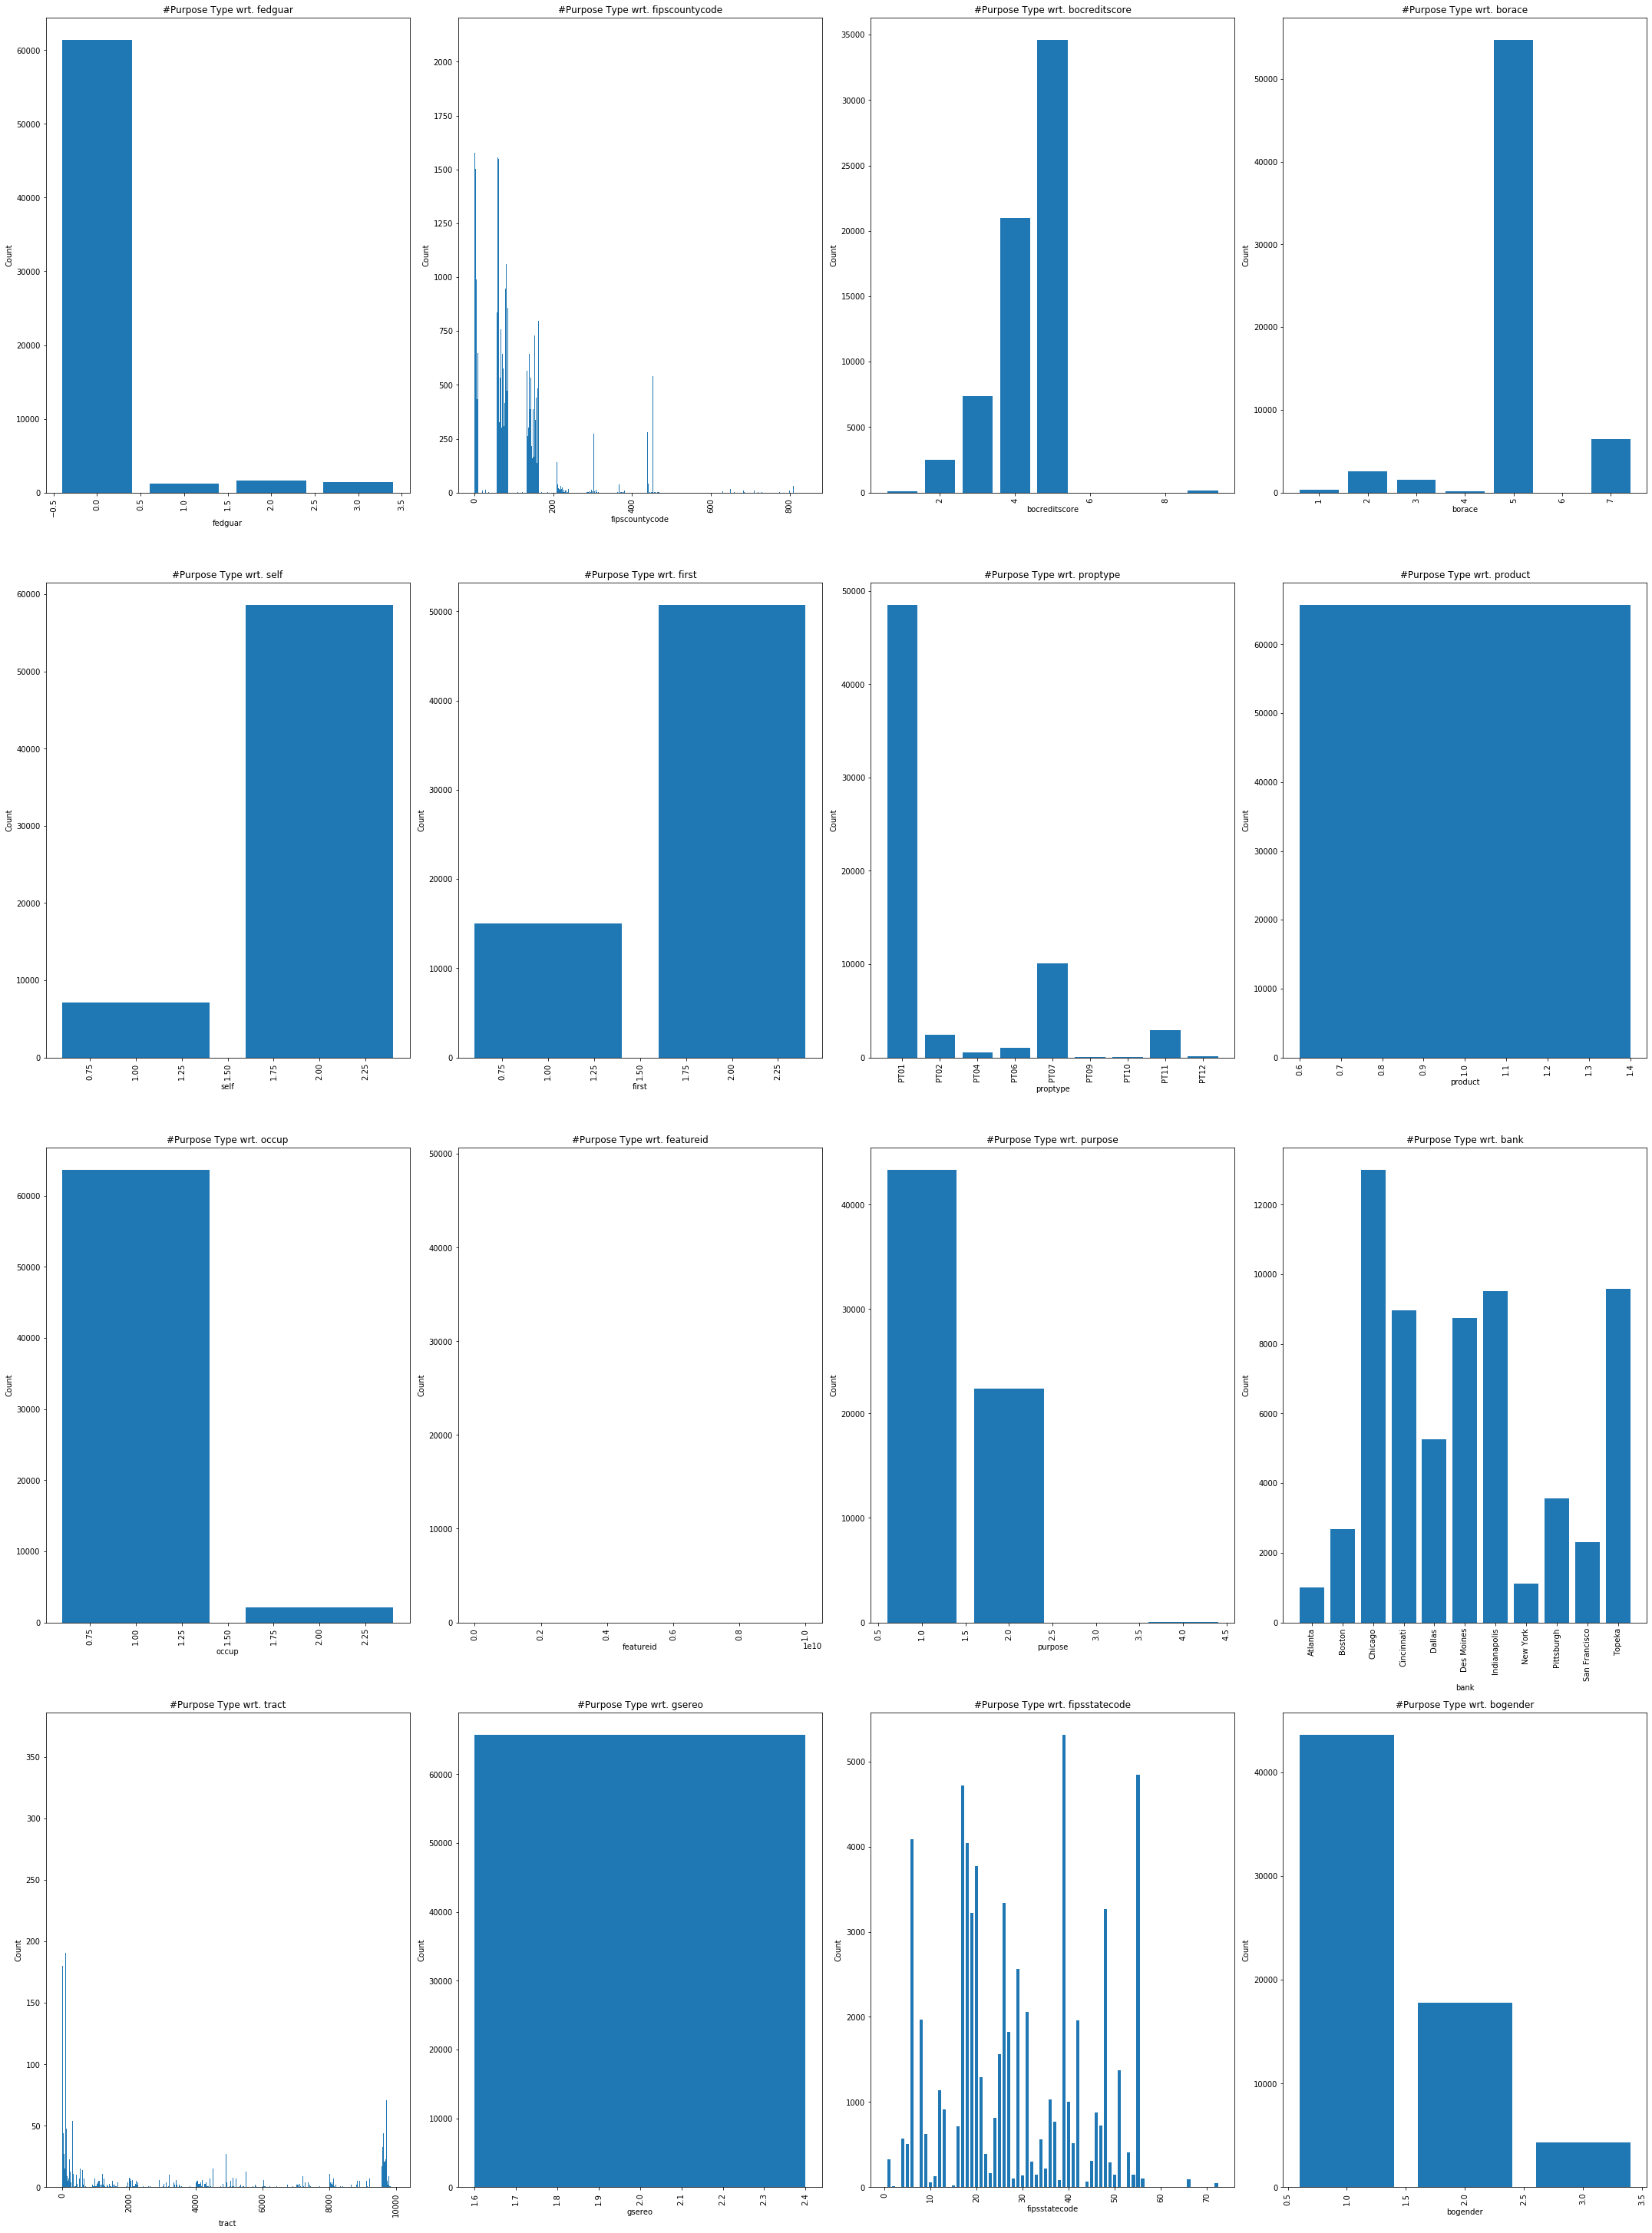

In [35]:
# # And how about our categorical data, what does that look like?
# # make graphs to visualize variation in categorical columns; 
plt.figure(figsize=(30,50))

for index, column in enumerate(feature_columns_cat):
    plt.subplot(5,4,index+1)
    plt.bar(df.groupby(column)["purpose"].count().index, df.groupby(column)["purpose"].count())
    plt.title(f"#Purpose Type wrt. {column}")
    plt.ylabel("Count")
    plt.xlabel(column)
    plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

Interestingly, quantity of mortgages meant for regular purchase vs refinance definitely varies with location, which is noted through a variety of columns. We suspect these columns will be colinear in a correlation matrix since they all are location related: fipsstatecode, tract,fipscountycode, bank. 
Additionally, we learn that some variables may not be useful at all such as product, featureid, selltype - in the case of these variables, though other categories are theoretically possible as per the dictionary, no other instances of the category exist. We will drop them going forward. 

We will revisit these categorical columns later; let's see what we can get with continuous variables for now.

In [36]:
# let's look at our continuous variables and use a correlation matrix 
# to remove colinear variables.
corr = df[feature_columns_cont].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/Users/Mahfuz-Tamim/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/Users/Mahfuz-Tamim/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/Users/Mahfuz-Tamim/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,year,minper,tramedy,locmedy,tractrat,curarey,incrat,upb,ltv,mortdate,acqudate,term,amorterm,numbor,numunits,rate,amount,front,back,pmi,income_win,age_win
year,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
minper,nan,1,-0.072,0.23,-0.17,0.21,0.0041,0.27,0.00011,-0.071,nan,0.074,0.074,-0.086,0.099,0.065,0.27,0.21,0.16,-0.0012,0.07,0.0074
tramedy,nan,-0.072,1,0.47,0.87,0.46,0.12,0.48,-0.11,-0.03,nan,0.09,0.09,0.048,-0.037,-0.036,0.48,0.14,0.067,-0.036,0.36,-0.0059
locmedy,nan,0.23,0.47,1,0.033,0.98,-0.072,0.43,-0.073,-0.019,nan,0.071,0.071,-0.0041,0.051,0.0093,0.43,0.23,0.14,-0.021,0.22,-0.076
tractrat,nan,-0.17,0.87,0.033,1,0.033,0.18,0.33,-0.083,-0.026,nan,0.07,0.07,0.053,-0.061,-0.044,0.33,0.056,0.014,-0.025,0.3,0.022
curarey,nan,0.21,0.46,0.98,0.033,1,-0.079,0.41,-0.072,0.029,nan,0.073,0.073,-0.0062,0.052,0.038,0.41,0.22,0.13,-0.021,0.22,-0.052
incrat,nan,0.0041,0.12,-0.072,0.18,-0.079,1,0.33,-0.047,-0.0078,nan,-0.022,-0.022,0.21,-0.013,-0.023,0.33,-0.32,-0.24,-0.026,0.61,0.054
upb,nan,0.27,0.48,0.43,0.33,0.41,0.33,1,0.017,-0.045,nan,0.19,0.19,0.16,0.049,0.04,1,0.26,0.19,0.0099,0.64,-0.009
ltv,nan,0.00011,-0.11,-0.073,-0.083,-0.072,-0.047,0.017,1,0.013,nan,0.24,0.24,-0.038,-0.039,0.11,0.017,0.0029,0.12,0.49,-0.049,-0.28
mortdate,nan,-0.071,-0.03,-0.019,-0.026,0.029,-0.0078,-0.045,0.013,1,nan,-0.0037,-0.0037,0.0075,-0.0096,0.35,-0.047,-0.02,-0.014,0.018,-0.0076,0.0076


That doesn't look good. Let's clean up our list of continuous variables.

In [37]:
feature_columns_cont

['year',
 'minper',
 'tramedy',
 'locmedy',
 'tractrat',
 'curarey',
 'incrat',
 'upb',
 'ltv',
 'mortdate',
 'acqudate',
 'term',
 'amorterm',
 'numbor',
 'numunits',
 'rate',
 'amount',
 'front',
 'back',
 'pmi',
 'income_win',
 'age_win']

In [38]:
feature_columns_cont1 = [#'year',
                        'minper',
                        'tramedy',
                        'locmedy',
                        'tractrat',
                        'curarey',
                        'incrat',
                        'upb',
                        'ltv',
                        'mortdate',
                        #'acqudate',
                        'term',
                        'amorterm',
                        'numbor',
                        'numunits',
                        'rate',
                        'amount',
                        'front',
                        'back',
                        'pmi',
                        'income_win',
                        'age_win']

In [39]:
# let's look at our updated continuous variables and use a correlation matrix 
# to remove colinear variables.
corr = df[feature_columns_cont1].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,minper,tramedy,locmedy,tractrat,curarey,incrat,upb,ltv,mortdate,term,amorterm,numbor,numunits,rate,amount,front,back,pmi,income_win,age_win
minper,1,-0.072,0.23,-0.17,0.21,0.0041,0.27,0.00011,-0.071,0.074,0.074,-0.086,0.099,0.065,0.27,0.21,0.16,-0.0012,0.07,0.0074
tramedy,-0.072,1,0.47,0.87,0.46,0.12,0.48,-0.11,-0.03,0.09,0.09,0.048,-0.037,-0.036,0.48,0.14,0.067,-0.036,0.36,-0.0059
locmedy,0.23,0.47,1,0.033,0.98,-0.072,0.43,-0.073,-0.019,0.071,0.071,-0.0041,0.051,0.0093,0.43,0.23,0.14,-0.021,0.22,-0.076
tractrat,-0.17,0.87,0.033,1,0.033,0.18,0.33,-0.083,-0.026,0.07,0.07,0.053,-0.061,-0.044,0.33,0.056,0.014,-0.025,0.3,0.022
curarey,0.21,0.46,0.98,0.033,1,-0.079,0.41,-0.072,0.029,0.073,0.073,-0.0062,0.052,0.038,0.41,0.22,0.13,-0.021,0.22,-0.052
incrat,0.0041,0.12,-0.072,0.18,-0.079,1,0.33,-0.047,-0.0078,-0.022,-0.022,0.21,-0.013,-0.023,0.33,-0.32,-0.24,-0.026,0.61,0.054
upb,0.27,0.48,0.43,0.33,0.41,0.33,1,0.017,-0.045,0.19,0.19,0.16,0.049,0.04,1,0.26,0.19,0.0099,0.64,-0.009
ltv,0.00011,-0.11,-0.073,-0.083,-0.072,-0.047,0.017,1,0.013,0.24,0.24,-0.038,-0.039,0.11,0.017,0.0029,0.12,0.49,-0.049,-0.28
mortdate,-0.071,-0.03,-0.019,-0.026,0.029,-0.0078,-0.045,0.013,1,-0.0037,-0.0037,0.0075,-0.0096,0.35,-0.047,-0.02,-0.014,0.018,-0.0076,0.0076
term,0.074,0.09,0.071,0.07,0.073,-0.022,0.19,0.24,-0.0037,1,1,-0.045,-0.0047,0.32,0.19,0.097,0.11,0.12,-0.00078,-0.078


Let's remove tractrat which is actually based on the tramedy column. We can also suffice with curarey and drop more detailed locmedy data. We can drop term and amorterm since almost all the data is from 2019. UPB and amount are the same since all the loans are from 2018. If we had data going back multiple years, the distinctions between these columns would have been more helpful. We will keep UPB.

In [40]:
# let's make a new variable of continuous variable features to keep as per our comments
feature_columns_cont2 =['minper',
                        'tramedy',
                        #'locmedy',
                        #'tractrat',
                        #'income',
                        'curarey',
                        'incrat',
                        'upb',
                        'ltv',
                        'mortdate',
                        #'term',
                        #'amorterm',
                        'numbor',
                        'numunits',
                        'rate',
                        #'amount',
                        'front',
                        'back',
                        'pmi',
                        'income_win',
                        'age_win']

In [41]:
# let's look at our updated continuous variables using correlation matrix
corr = df[feature_columns_cont2].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,minper,tramedy,curarey,incrat,upb,ltv,mortdate,numbor,numunits,rate,front,back,pmi,income_win,age_win
minper,1,-0.072,0.21,0.0041,0.27,0.00011,-0.071,-0.086,0.099,0.065,0.21,0.16,-0.0012,0.07,0.0074
tramedy,-0.072,1,0.46,0.12,0.48,-0.11,-0.03,0.048,-0.037,-0.036,0.14,0.067,-0.036,0.36,-0.0059
curarey,0.21,0.46,1,-0.079,0.41,-0.072,0.029,-0.0062,0.052,0.038,0.22,0.13,-0.021,0.22,-0.052
incrat,0.0041,0.12,-0.079,1,0.33,-0.047,-0.0078,0.21,-0.013,-0.023,-0.32,-0.24,-0.026,0.61,0.054
upb,0.27,0.48,0.41,0.33,1,0.017,-0.045,0.16,0.049,0.04,0.26,0.19,0.0099,0.64,-0.009
ltv,0.00011,-0.11,-0.072,-0.047,0.017,1,0.013,-0.038,-0.039,0.11,0.0029,0.12,0.49,-0.049,-0.28
mortdate,-0.071,-0.03,0.029,-0.0078,-0.045,0.013,1,0.0075,-0.0096,0.35,-0.02,-0.014,0.018,-0.0076,0.0076
numbor,-0.086,0.048,-0.0062,0.21,0.16,-0.038,0.0075,1,-0.022,-0.03,-0.23,-0.098,-0.0085,0.36,0.02
numunits,0.099,-0.037,0.052,-0.013,0.049,-0.039,-0.0096,-0.022,1,0.017,0.062,0.044,-0.037,-0.0094,-0.0057
rate,0.065,-0.036,0.038,-0.023,0.04,0.11,0.35,-0.03,0.017,1,0.077,0.12,0.08,-0.026,0.00086


## 4. Unsupervised Models

In [42]:
# the column purpose has category descriptions on whether a mortgage is for
# a regular purchase (1), refinance (2), and new construction (4)
df.groupby("purpose").purpose.count()

# We will do a run down of how the models look without fixing the class inbalance.
# Then we will sample from the regular purchase group so that we can make even classes
# and rerun the tests.

purpose
1    43313
2    22374
4       16
Name: purpose, dtype: int64

### K-mean clusters

In [43]:
# define dataframe with only the useful continuous variables
df1 = df[feature_columns_cont2] 

# Define the features and the outcome.
X = df1

# three targets from purpose
y = df['purpose']

#### a. without normalization of X, k = 2

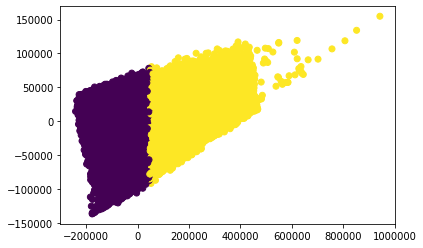

Comparing k-means clusters against the data:
purpose      1      2   4
row_0                    
0        29935  15765  11
1        13378   6609   5


In [44]:
# without normalization
# Reduce it to two components.
X_pca = PCA(2).fit_transform(X)

# Calculate predicted values, k = 2.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

The clusters don't seem to be based on the purpose columns and don't mimic them well.

#### b. with normalization of X, k = 2

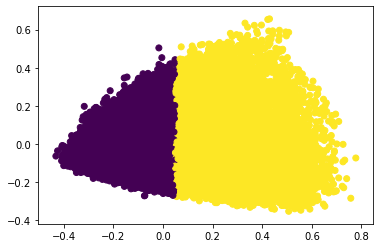

Comparing k-means clusters against the data:
purpose      1      2   4
row_0                    
0        28784  13836  16
1        14529   8538   0


In [45]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values, k = 2.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

Normalization helps to balance out the weight of some the features it seems, but again The clusters don't seem to be based on the purpose columns and don't mimic them well.

#### c. without normalization of X, k = 3

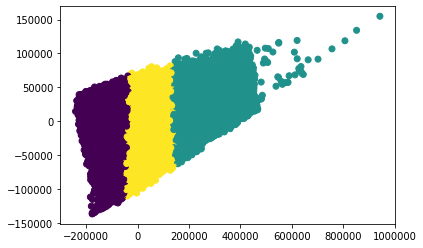

Comparing k-means clusters against the data:
purpose      1      2   4
row_0                    
0        19252  10716   0
1         6844   3559   1
2        17217   8099  15


In [46]:
# without normalization
# Reduce it to two components.
X_pca = PCA(2).fit_transform(X)

# Calculate predicted values, k = 3.
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

#### d. with normalization of X, k = 3

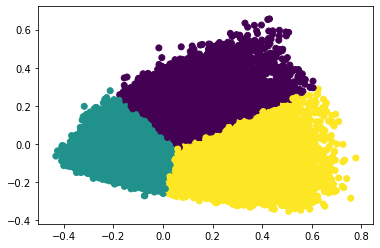

Comparing k-means clusters against the data:
purpose      1      2   4
row_0                    
0         9099   5130   5
1        24185  11742  11
2        10029   5502   0


In [47]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values, k = 3.
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

Increasing the k clusters don't seem to be helping us parse out for the different purpose groups. It would seem as though the algorithm can segregate the dataset but it's not immediately clear what these clusters represent.

#### Use elbow method to determine optimal k clusters.

In [48]:
# get range of inertia scores with increase k values. 
# Inflection pt in the graph will tell you optimal clusters
scores = [KMeans(n_clusters=i+2).fit(X_norm).inertia_ for i in range(10)]

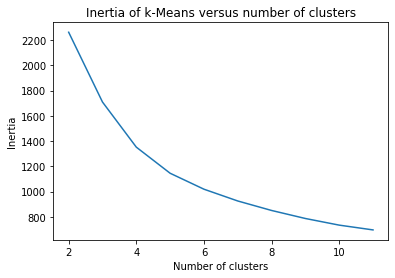

In [49]:
%matplotlib inline
sns.lineplot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

plt.show()
## Helpful background: https://towardsdatascience.com/cluster-analysis-create-visualize-and-interpret-customer-segments-474e55d00ebb

It would seem that the optimal amount of clusters is 4 which is where the inflection point is in the inertia graph above. 

### Mean shift clusters

In [50]:
#Divide into training and test sets.
# Normalize the data.
X_norm = normalize(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_norm,
    y,
    test_size=0.9,
    random_state=42)

In [51]:
X_train

array([[6.07826115e-06, 3.99472473e-01, 3.76460045e-01, ...,
        0.00000000e+00, 4.86319714e-01, 3.52931293e-04],
       [4.15499451e-05, 1.73975093e-01, 1.46895167e-01, ...,
        0.00000000e+00, 1.85611329e-01, 6.33168821e-05],
       [1.27609627e-06, 1.89235624e-01, 1.45096872e-01, ...,
        0.00000000e+00, 3.20016587e-01, 8.74362259e-05],
       ...,
       [5.73058802e-05, 2.14078257e-01, 1.33668714e-01, ...,
        0.00000000e+00, 1.59710003e-01, 8.29401834e-05],
       [2.79007072e-04, 8.17967970e-02, 2.60284229e-01, ...,
        0.00000000e+00, 2.34938639e-01, 1.79886139e-04],
       [1.36045505e-04, 4.25036982e-01, 3.80571739e-01, ...,
        7.11349044e-07, 3.55674522e-01, 1.77837261e-04]])

In [52]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Reduce it to three components.
X_pca = PCA(3).fit_transform(X_train)

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 3


<IPython.core.display.Javascript object>


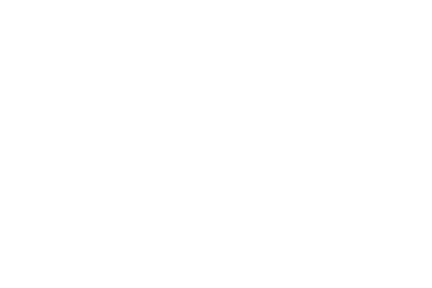

<IPython.core.display.Javascript object>


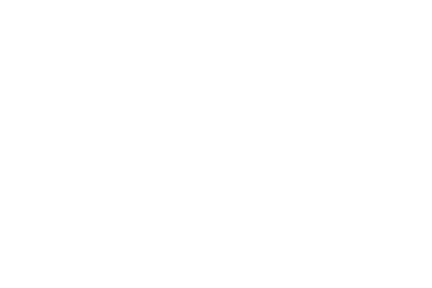

In [53]:
from mpl_toolkits.mplot3d import Axes3D

# needed to play with 3D aspect of graph
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = X_pca[:, 0]
y = X_pca[:, 1]
z = X_pca[:, 2]

ax.scatter(x, y, z, c=labels, marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    #plt.pause(.001)

In [54]:
#reset to seeing plots inline (3D animation will stop)
%matplotlib inline 

In [55]:
print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

Comparing the assigned categories to the ones in the data:
col_0       0    1   2
purpose               
1        4138  174  92
2        1982  113  70
4           1    0   0


This algorithm sees three clusters as optimal but this too does not align well with our purpose category. Clearly other features are being clustered in the dataset.

## 5.  Revised Unsupervised Models, Classes Balanced

In [56]:
# the column purpose has category descriptions on whether a mortgage is for
# a regular purchase (1), refinance (2), and new construction (4)
df.groupby("purpose").purpose.count()

# Sample from the regular purchase group and drop new construction entries so that
# we can make compare balanced classes.

purpose
1    43313
2    22374
4       16
Name: purpose, dtype: int64

In [57]:
df.purpose.value_counts()[2]


22374

In [58]:
df1 = df[df.purpose != 4]
print (f"We have dropped {df.shape[0] - df1.shape[0]} entries")
df1

We have dropped 16 entries


,year,assignedid,bank,fipsstatecode,fipscountycode,msa,featureid,tract,minper,tramedy,...,corace4,corace5,hoepa,lienstatus,spchsggoals,fedfinstbltyplan,acqtyp,gsereo,income_win,age_win
0,2018,2131406,Atlanta,24,21,47900,9999999999,7512.01,29.85,93261,...,6,6,2,1,2,2,1,2,146196,41
1,2018,2131407,Atlanta,24,17,47900,9999999999,8509.04,67.24,112623,...,6,6,2,1,2,2,1,2,156972,61
2,2018,2131408,Atlanta,51,153,47900,9999999999,9012.36,40.76,140156,...,6,6,2,1,2,2,1,2,191660,55
3,2018,2131409,Atlanta,51,59,47900,9999999999,4221.02,75.97,89250,...,8,8,2,1,2,2,1,2,132000,27
4,2018,2131410,Atlanta,24,5,12580,9999999999,4924.02,64.56,81397,...,8,8,2,1,2,2,1,2,29376,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65698,2018,2161350,Topeka,40,143,46140,9999999999,75.22,22.82,69635,...,6,6,2,1,2,2,1,2,100008,43
65699,2018,2161351,Topeka,31,109,30700,9999999999,37.09,7.61,94198,...,6,6,2,1,2,2,1,2,154452,55
65700,2018,2161352,Topeka,19,133,99999,9999999999,9602.00,3.69,69688,...,8,8,2,1,2,2,1,2,54540,26
65701,2018,2161353,Topeka,31,153,36540,9999999999,106.23,10.16,98707,...,6,6,2,1,2,2,1,2,87996,26


In [59]:
# make a dummy df where we sample the amount of entries we want to drop from the 
# original df in order to balance out the two clases
df2 = df1[df1.purpose == 1].sample(n = df.purpose.value_counts()[1] - df.purpose.value_counts()[2], random_state=1)
df2.shape

(20939, 84)

In [60]:
df.assignedid.nunique()

65703

In [61]:
combined = df1.append(df2)
df3 = combined[~combined.index.duplicated(keep=False)]
df3.shape

(44748, 84)

### K-mean clusters

In [62]:
# define dataframe with only the useful continuous variables
df4 = df3[feature_columns_cont2] 

# Define the features and the outcome.
X = df4

# two targets from purpose
y = df3['purpose']

#### a. without normalization of X, k = 2

In [ ]:
# without normalization
# Reduce it to two components.
X_pca = PCA(2).fit_transform(X)

# Calculate predicted values, k = 2.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

#### b. with normalization of X, k = 2

In [ ]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values, k = 2.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

#### c. without normalization of X, k = 3

In [ ]:
# without normalization
# Reduce it to two components.
X_pca = PCA(2).fit_transform(X)

# Calculate predicted values, k = 3.
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

#### d. with normalization of X, k = 3

In [ ]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values, k = 3.
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

#### Use elbow method to determine optimal k clusters.

In [ ]:
# get range of inertia scores with increase k values. 
# Inflection pt will tell you optimal clusters
scores = [KMeans(n_clusters=i+2).fit(X_norm).inertia_ for i in range(10)]

In [ ]:
%matplotlib inline
sns.lineplot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

plt.show()
## Helpful background: https://towardsdatascience.com/cluster-analysis-create-visualize-and-interpret-customer-segments-474e55d00ebb

It would seem that the optimal amount of clusters is 4 which is where the inflection point is in the inertia graph above. 

### Mean shift clusters

In [ ]:
#Divide into training and test sets.
# Normalize the data.
X_norm = normalize(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_norm,
    y,
    test_size=0.9,
    random_state=42)

In [ ]:
X_train

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_train)

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


In [ ]:
#reset to seeing plots inline (3D animation will stop)
%matplotlib inline 
# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.show()

In [ ]:
print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

# Neural Networks

"Create a multi-layer perceptron neural network model to predict on a labeled dataset of your choosing. Compare this model to either a boosted tree or a random forest model and describe the relative tradeoffs between complexity and accuracy. Be sure to vary the hyperparameters of your MLP!"

In [63]:
# Alright! We've done our prep, let's build the model.
# Neural networks are hugely computationally intensive.
# This may take several minutes to run.


# Import the model.
from sklearn.neural_network import MLPClassifier

# Establish and fit the model, with a single, 1000 perceptron layer.
mlp = MLPClassifier(hidden_layer_sizes=(1000,))
mlp.fit(X, y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1000,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [65]:
mlp.score(X, y)

0.5004245999821221

In [66]:
y.value_counts()/len(y)

2    0.5
1    0.5
Name: purpose, dtype: float64

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(mlp, X, y, cv=5)

/Users/Mahfuz-Tamim/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


This computation was computationally intensive - it took a while to run but the end product was no more valuable than the clustering models I tried before this. Clearly I'm not able to reject the null hypothesis (which is that there are no differences between puchase and refinance mortgages). Going forward, we can compare this to a gradient boosted forest model to see compare the relavent features for both models and which one does a better job at explaining the variance.

# Conclusion

After a second round of cleaning the data, taking care of class bias and rerunning K-means and mean shift unsupervised models, we are not really segregating  the data in anything more than a 50-50 split. It would seem as though the algorithm was not able to find true clusters and so the probability of ending up in one cluster or another is no better than the flip of a coin. Therefore, it would seem as though we would accept our null hypothesis of no apparent differences noted between mortgages meant for purchases vs mortgages meant for refinancing. It would be interesting to determine the features that contribute to the clusters we found in a future project.